## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [1]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Lectura del dataset generado previamente

In [2]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil,...,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,nivel_educativo,nivel_tarjeta,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,5_a_10,menor_25,C,...,11000,3,HIPOTECA,INVERSIONES,N,ACTIVO,F,SECUNDARIO_COMPLETO,Blue,3.0
1,15_a_30,menor_1k,3k_a_5k,2y_a_4y,15p_a_20p,20k_a_50k,hasta_20,menor_5,menor_25,S,...,1500,2,ALQUILER,MEJORAS_HOGAR,Y,PASIVO,M,DESCONOCIDO,Blue,0.0
2,15_a_30,1k_a_4k,5k_a_10k,2y_a_4y,7p_a_15p,20k_a_50k,20_a_40,5_a_10,menor_25,D,...,10000,2,OTROS,EDUCACIÓN,Y,PASIVO,M,POSGRADO_COMPLETO,Blue,3.0
3,75_a_100,1k_a_4k,menor_3k,menor_2y,7p_a_15p,20k_a_50k,20_a_40,menor_5,25_a_30,S,...,6000,4,ALQUILER,INVERSIONES,N,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,Blue,2.0
4,50_a_75,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,20_a_40,menor_5,25_a_30,C,...,10000,2,HIPOTECA,EDUCACIÓN,N,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,Blue,2.0


### Revisión de meta-datos

In [3]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

operaciones_ult_12m
gastos_ult_12m
limite_credito_tc
antiguedad_cliente
tasa_interes
ingresos
pct_ingreso
antiguedad_empleado
edad
estado_civil
estado_credito
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
estado_cliente
genero
nivel_educativo
nivel_tarjeta
personas_a_cargo

Cantidad de filas: 10108


### Armado de los sets de entrenamiento y testeo

In [4]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values

features = datos[['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'tasa_interes', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'importe_solicitado', 'duracion_credito',
       'situacion_vivienda', 'objetivo_credito', 'estado_credito',
       'estado_civil', 'estado_cliente', 'genero',
       'nivel_educativo', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_credito,estado_civil,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,5_a_10,menor_25,11000,3,HIPOTECA,INVERSIONES,C,C,ACTIVO,F,SECUNDARIO_COMPLETO,3.0
1,15_a_30,menor_1k,3k_a_5k,2y_a_4y,15p_a_20p,20k_a_50k,hasta_20,menor_5,menor_25,1500,2,ALQUILER,MEJORAS_HOGAR,P,S,PASIVO,M,DESCONOCIDO,0.0
2,15_a_30,1k_a_4k,5k_a_10k,2y_a_4y,7p_a_15p,20k_a_50k,20_a_40,5_a_10,menor_25,10000,2,OTROS,EDUCACIÓN,C,D,PASIVO,M,POSGRADO_COMPLETO,3.0
3,75_a_100,1k_a_4k,menor_3k,menor_2y,7p_a_15p,20k_a_50k,20_a_40,menor_5,25_a_30,6000,4,ALQUILER,INVERSIONES,C,S,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,50_a_75,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,20_a_40,menor_5,25_a_30,10000,2,HIPOTECA,EDUCACIÓN,C,C,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0


In [5]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,operaciones_ult_12m_menor_15,gastos_ult_12m_1k_a_4k,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,11000,3,3.0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
1,1500,2,0.0,True,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
2,10000,2,3.0,True,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False
3,6000,4,2.0,False,False,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True
4,10000,2,2.0,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [6]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [7]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          16000.0
duracion_credito                                2.0
personas_a_cargo                                3.0
operaciones_ult_12m_15_a_30                   False
operaciones_ult_12m_30_a_50                    True
                                             ...   
nivel_educativo_POSGRADO_COMPLETO             False
nivel_educativo_POSGRADO_INCOMPLETO           False
nivel_educativo_SECUNDARIO_COMPLETO           False
nivel_educativo_UNIVERSITARIO_COMPLETO        False
nivel_educativo_UNIVERSITARIO_INCOMPLETO       True
Name: 7738, Length: 65, dtype: object
--------------------------------------------------
Label del registro: 
Y

##################################################
##################################################

Un registro de testeo: 
importe_solicitado                          1750.0
duracion_credito                               2.0
personas_a_cargo                               2.0
oper

In [8]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [9]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

#### ZeroR

In [10]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

DummyClassifier(constant=None, random_state=None, strategy='prior')

In [11]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.8306292045904234
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y']


----
Se pasa a configurar la serie de experimentos en **mlflow**

In [12]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Prueba #1")
mlflow.autolog()

2024/03/11 22:10:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Regresión Logística

In [13]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear')

    lreg.fit(train_data, train_labels)

2024/03/11 22:11:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\guillermo\anaconda3\envs\conda-windows\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


Rendimiento obtenido: 0.8682231895528294
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.94      0.92      2099
           Y       0.64      0.52      0.57       428

    accuracy                           0.87      2527
   macro avg       0.77      0.73      0.75      2527
weighted avg       0.86      0.87      0.86      2527

Matriz de confusión:


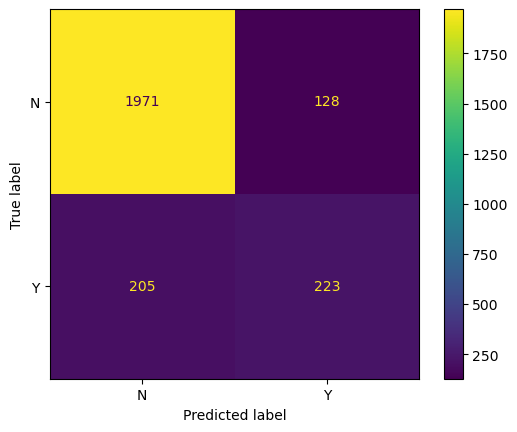

In [14]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Rendimiento obtenido: 0.8326078353779185
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.83      1.00      0.91      2099
           Y       0.86      0.01      0.03       428

    accuracy                           0.83      2527
   macro avg       0.84      0.51      0.47      2527
weighted avg       0.84      0.83      0.76      2527

Matriz de confusión:


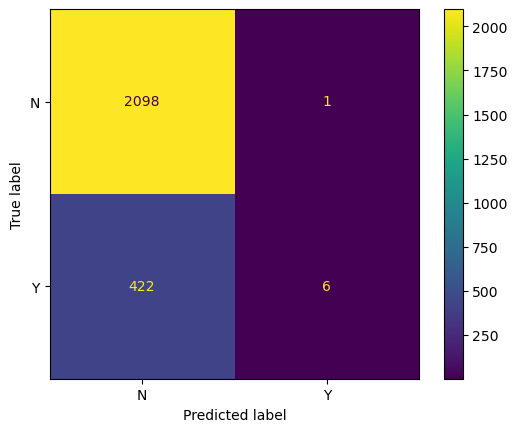

In [16]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles de Decisión (TDIDT)

In [17]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

Rendimiento obtenido: 0.8789077958053028
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      2099
           Y       0.66      0.59      0.62       428

    accuracy                           0.88      2527
   macro avg       0.79      0.76      0.78      2527
weighted avg       0.87      0.88      0.88      2527

Matriz de confusión:


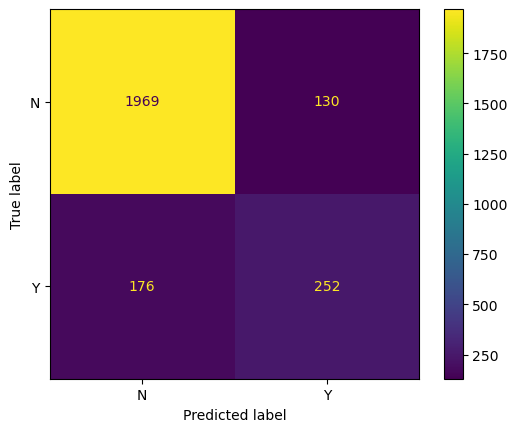

In [18]:
evaluar_modelo(dtc, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8793035219628017
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.96      0.93      2099
           Y       0.71      0.49      0.58       428

    accuracy                           0.88      2527
   macro avg       0.81      0.72      0.75      2527
weighted avg       0.87      0.88      0.87      2527

Matriz de confusión:


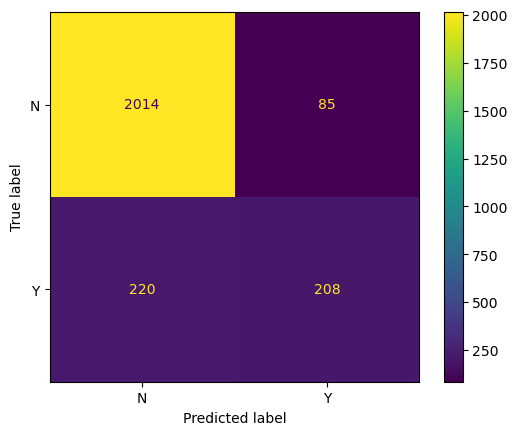

In [20]:
evaluar_modelo(rndf, test_data, test_labels)

----
Prueba #2

In [21]:
mlflow.set_experiment(experiment_name="Prueba #2")


2024/03/11 23:04:49 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #2' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/guillermo/Documents/VIU/13MBID-ABR23/notebooks/03-Modelado%2BEvaluacion/mlruns/975707687366832107', creation_time=1710216289129, experiment_id='975707687366832107', last_update_time=1710216289129, lifecycle_stage='active', name='Prueba #2', tags={}>

#### Árboles de Decisión (TDIDT)

In [24]:
with mlflow.start_run(run_name='Decision Tree (#2)'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='entropy', 
                                 min_samples_split=15)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8765334388603087
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.93      0.93      2099
           Y       0.65      0.59      0.62       428

    accuracy                           0.88      2527
   macro avg       0.78      0.76      0.77      2527
weighted avg       0.87      0.88      0.87      2527

Matriz de confusión:


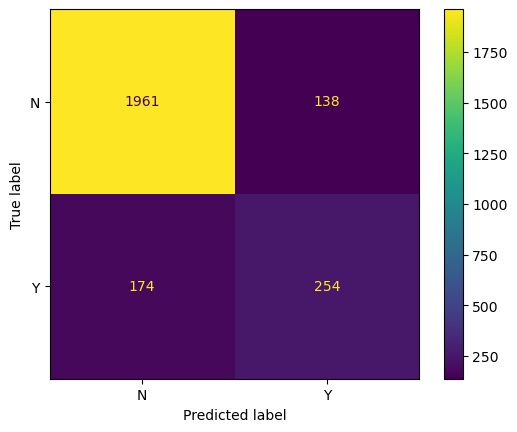

In [25]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(dtc, test_data, test_labels)

#### Regresión Logística

In [34]:
with mlflow.start_run(run_name='Logistic Regression #2'):
    lreg = LogisticRegression(solver = 'newton-cg',
                              max_iter= 200)

    lreg.fit(train_data, train_labels)

c:\Users\guillermo\anaconda3\envs\conda-windows\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\guillermo\anaconda3\envs\conda-windows\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\guillermo\anaconda3\envs\conda-windows\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8789077958053028
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.94      0.93      2099
           Y       0.66      0.59      0.62       428

    accuracy                           0.88      2527
   macro avg       0.79      0.76      0.78      2527
weighted avg       0.87      0.88      0.88      2527

Matriz de confusión:


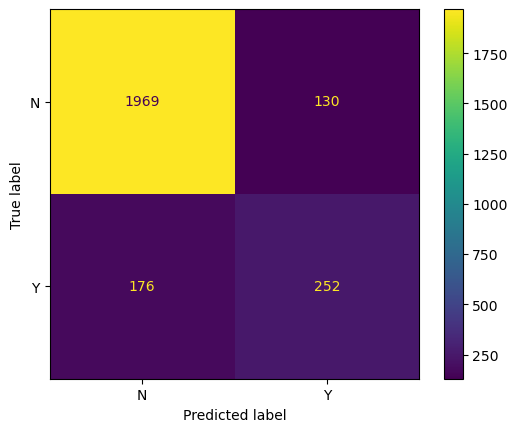

In [35]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(lreg, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [32]:
with mlflow.start_run(run_name='Random Forest #2'):
    rndf = RandomForestClassifier(n_estimators=20)
    rndf.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8828650573802929
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.96      0.93      2099
           Y       0.72      0.51      0.59       428

    accuracy                           0.88      2527
   macro avg       0.81      0.73      0.76      2527
weighted avg       0.87      0.88      0.87      2527

Matriz de confusión:


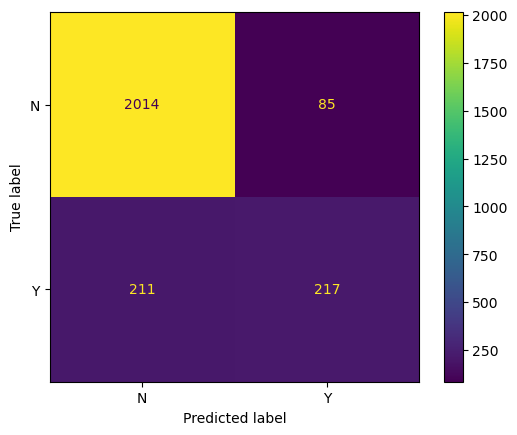

In [33]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(rndf, test_data, test_labels)

----
Prueba #3

In [36]:
mlflow.set_experiment(experiment_name="Prueba #3")

2024/03/12 00:00:19 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #3' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///c:/Users/guillermo/Documents/VIU/13MBID-ABR23/notebooks/03-Modelado%2BEvaluacion/mlruns/642910274975802156', creation_time=1710219619345, experiment_id='642910274975802156', last_update_time=1710219619345, lifecycle_stage='active', name='Prueba #3', tags={}>

#### Regresión Logística

In [51]:
with mlflow.start_run(run_name='Logistic Regression #3'):
    lreg = LogisticRegression(solver = 'liblinear',
                              max_iter= 400)

    lreg.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.8682231895528294
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.94      0.92      2099
           Y       0.64      0.52      0.57       428

    accuracy                           0.87      2527
   macro avg       0.77      0.73      0.75      2527
weighted avg       0.86      0.87      0.86      2527

Matriz de confusión:


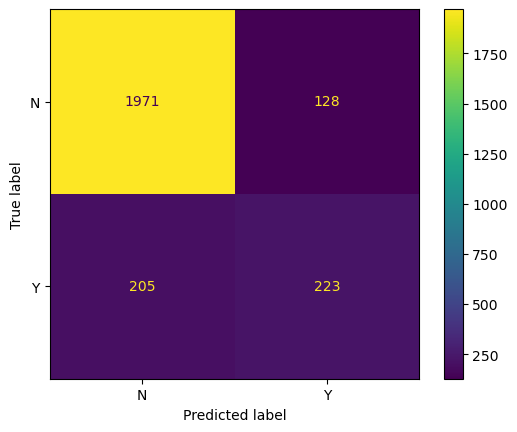

In [52]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(lreg, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [53]:
with mlflow.start_run(run_name='Random Forest #3'):
    rndf = RandomForestClassifier(n_estimators=200)
    rndf.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.8832607835377918
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.96      0.93      2099
           Y       0.71      0.53      0.61       428

    accuracy                           0.88      2527
   macro avg       0.81      0.74      0.77      2527
weighted avg       0.87      0.88      0.88      2527

Matriz de confusión:


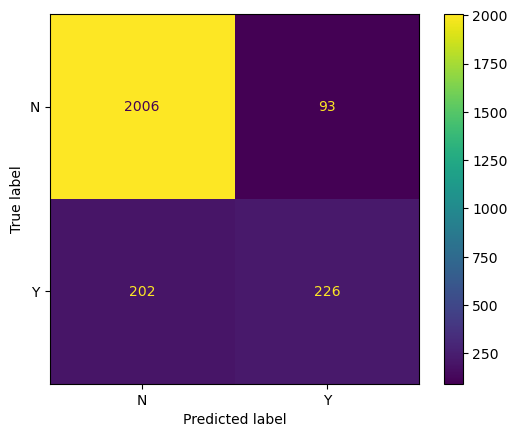

In [54]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(rndf, test_data, test_labels)

#### TODO: posibilidades de mejora de la libreta

* Evaluación del clasificador a través de validación cruzada
* Ejecutar pruebas que contemplen datos con mayor o menor grado de transformaciones aplicadas 
* Implementar clasificación con otras técnicas (por ejemplo: redes neuronales, SVM, entre otras)
* Evaluar la combinación de técnicas, por ejemplo: clustering y sobre esos resultados aplicación de árboles de decisión para detectar patrones de agrupamiento y ahí relacionarlo con la situación de los clientes.
* Integrar técnicas de extracción de reglas de asociación (con mayor "legibilidad" para usuarios no-técnicos)
* Entre otras opciones

----

### Prueba de despliegue (utilzando datos nuevos)

In [29]:
datos_nuevos = pd.read_csv('../../data/final/datos_nuevos.csv', sep=';')
datos_nuevos.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


**Importante**: recordar que si se implementan operaciones de transformación sobre los datos será necesario (posiblemente) replicarlas sobre los datos nuevos para que ambos datasets sean compatibles.

#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [30]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0: 'C',
    1 : 'P',
}

estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# df_final = pd.concat([estado_civil_N, estado_credito_N, df_integrado], axis=1)
# df_final.head()

# Antiguedad del empleado

etiquetas_a_e = ['menor_10', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(datos_nuevos['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

# antiguedad_empleados_N.value_counts()

# edad

etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

# edad_N.value_counts()

# pct_ingreso

etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

# pct_ingreso_N.value_counts()

# ingresos

etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

# ingresos_N.value_counts()

# tasa_interes

etiquetas_t_i = ['hasta_7p', '7p_a_15p', '15p_a_20p', 'mayor_20p']
rangos_t_i = [0, 6.99, 14.99, 19.99, 100]
tasa_interes_N = pd.cut(datos_nuevos['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

# tasa_interes_N.value_counts()

# antiguedad_cliente

etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

# antiguedad_cliente_N.value_counts()

# limite_credito_tc

etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

# limite_credito_tc_N.value_counts()

# gastos_ult_12m

etiquetas_g_u12 = ['menor_1k', '2k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

# gastos_ult_12m_N.value_counts()

# operaciones_ult_12m

etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

# operaciones_ult_12m_N.value_counts()

col_eliminar_final = [
              'edad',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso', 
              'tasa_interes',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'nivel_tarjeta',
              'estado_civil',
              'estado_credito',
              'id_cliente']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


df_nuevo = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, estado_civil_N, estado_credito_N, datos_nuevos], axis=1)
df_nuevo.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,hasta_7p,50k_a_100k,hasta_20,menor_10,menor_25,S,C,4000,4,HIPOTECA,PERSONAL,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,1.0
1,75_a_100,2k_a_4k,menor_3k,menor_2y,7p_a_15p,mayor_100k,hasta_20,menor_10,25_a_30,C,C,10000,2,ALQUILER,INVERSIONES,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,50_a_75,2k_a_4k,3k_a_5k,2y_a_4y,7p_a_15p,20k_a_50k,hasta_20,menor_10,menor_25,C,C,1700,2,HIPOTECA,SALUD,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,1.0
3,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,menor_10,25_a_30,C,C,7200,4,ALQUILER,PAGO_DEUDAS,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,75_a_100,4k_a_6k,3k_a_5k,2y_a_4y,7p_a_15p,50k_a_100k,hasta_20,5_a_10,25_a_30,C,C,5000,3,HIPOTECA,PAGO_DEUDAS,ACTIVO,F,SECUNDARIO_COMPLETO,1.0


In [31]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   importe_solicitado                        112 non-null    int64  
 1   duracion_credito                          112 non-null    int64  
 2   personas_a_cargo                          112 non-null    float64
 3   operaciones_ult_12m_menor_15              112 non-null    bool   
 4   operaciones_ult_12m_15_a_30               112 non-null    bool   
 5   operaciones_ult_12m_30_a_50               112 non-null    bool   
 6   operaciones_ult_12m_50_a_75               112 non-null    bool   
 7   operaciones_ult_12m_75_a_100              112 non-null    bool   
 8   operaciones_ult_12m_mayor_100             112 non-null    bool   
 9   gastos_ult_12m_menor_1k                   112 non-null    bool   
 10  gastos_ult_12m_2k_a_4k                

In [32]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

{'antiguedad_empleado_menor_5', 'situacion_vivienda_OTROS'}

Datos nuevos: 67
Datos entrenamiento: 65
set()


In [33]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['importe_solicitado', 'duracion_credito', 'personas_a_cargo',
       'operaciones_ult_12m_15_a_30', 'operaciones_ult_12m_30_a_50',
       'operaciones_ult_12m_50_a_75', 'operaciones_ult_12m_75_a_100',
       'operaciones_ult_12m_mayor_100', 'operaciones_ult_12m_menor_15',
       'gastos_ult_12m_2k_a_4k', 'gastos_ult_12m_4k_a_6k',
       'gastos_ult_12m_6k_a_8k', 'gastos_ult_12m_8k_a_10k',
       'gastos_ult_12m_mayor_10k', 'gastos_ult_12m_menor_1k',
       'limite_credito_tc_3k_a_5k', 'limite_credito_tc_5k_a_10k',
       'limite_credito_tc_mayor_10k', 'limite_credito_tc_menor_3k',
       'antiguedad_cliente_2y_a_4y', 'antiguedad_cliente_mayor_4y',
       'antiguedad_cliente_menor_2y', 'tasa_interes_15p_a_20p',
       'tasa_interes_7p_a_15p', 'tasa_interes_hasta_7p',
       'tasa_interes_mayor_20p', 'ingresos_20k_a_50k', 'ingresos_50k_a_100k',
       'ingresos_hasta_20k', 'ingresos_mayor_100k', 'pct_ingreso_20_a_40',
       'pct_ingreso_40_a_60', 'pct_ingreso_hasta_20', 'pct_ingr

In [35]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = dtc.predict(nuevos_codif)

prediccionDF = pd.DataFrame(prediccion_nuevos)

2023/11/14 15:36:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/rey/miniconda3/envs/data/lib/python3.10/site-packages/mlflow/data/pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [36]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()

prediccion_mora
N    81
Y    31
Name: count, dtype: int64